# Clustering

### Comparaison de données : climat pluvieux vs climat sec

Dans cette partie, nous nous proposons de comparer deux stations situées dans des endroits au climat très différent : la station de Guipavas, près de Brest, en Bretagne, et la station de Perpignan, dans le sud de la France. Nous partons du postulat que la station brestoise a un climat pluvieux et nous souhaitons effectuer une présentation croisée des données respectives des deux stations.

In [20]:
# Chargement des données nettoyées pour les deux stations
data_cleaned_7747 <- read.csv("/home/jmaubian/SDD/Projet_stat_meteo/stations_csv/station_7747.csv", header = TRUE, sep=",", dec=".")
data_cleaned_7110 <- read.csv("/home/jmaubian/SDD/Projet_stat_meteo/stations_csv/station_7110.csv", header = TRUE, sep=",", dec=".")

Nous voulons dans un premier temps comparer simplement les températures mmédianes par saison afin de vérifier notre intuiton première : il fait statistiquement plus chaud dans le sud qu'en Bretagne. Pour cela, nous traçons simplement les *boxplots* des températures par saison de chacune des stations.

Warning message:
“Removed 21 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 94 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


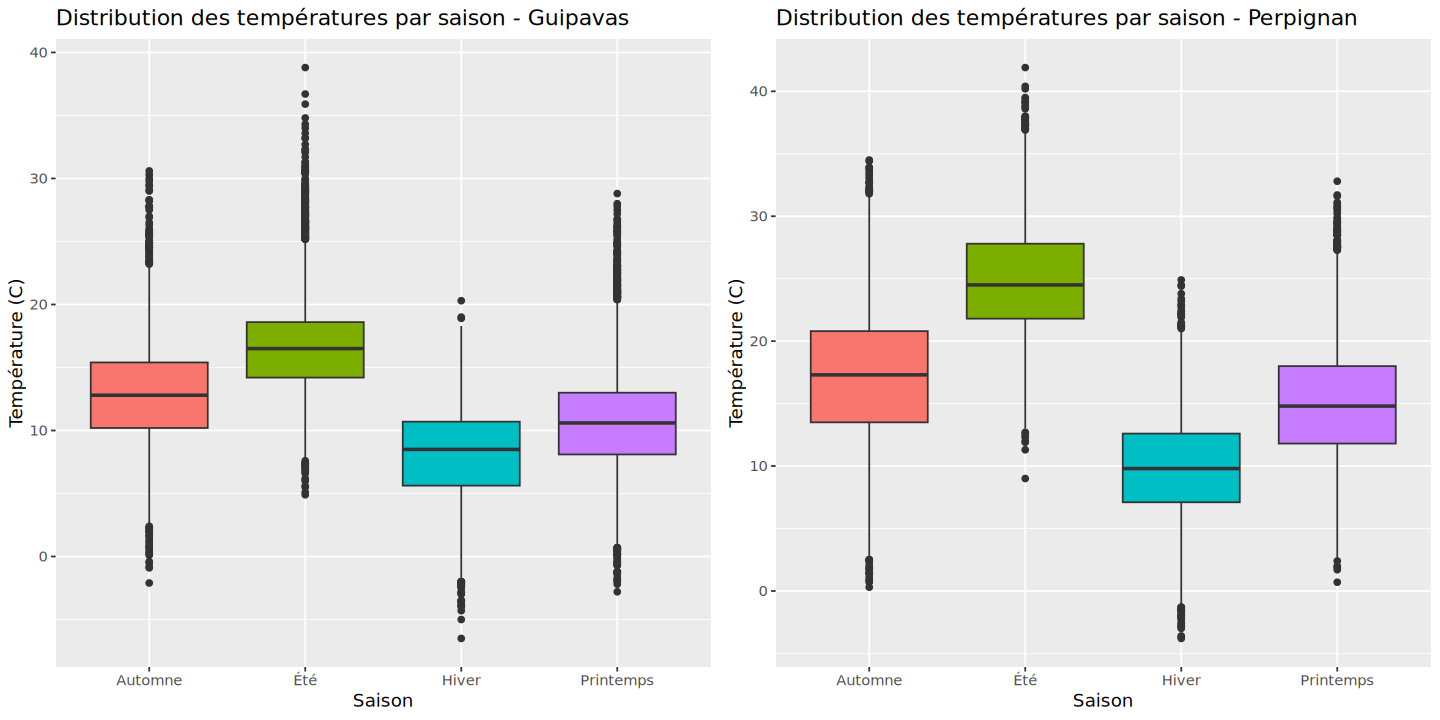

In [21]:
# Packages nécessaires
library(lubridate)
library(ggplot2)
library(gridExtra)

### Guipavas
options(repr.plot.width=12, repr.plot.height=6)

# Regrouper par mois ou saisons
data_cleaned_7110$Date <- as.POSIXct(data_cleaned_7110$Date, format="%Y-%m-%dT%H:%M:%S", tz="Europe/Berlin")
data_cleaned_7110$mois <- month(data_cleaned_7110$Date)
data_cleaned_7110$saison <- ifelse(data_cleaned_7110$mois %in% c(12, 1, 2), "Hiver",
                            ifelse(data_cleaned_7110$mois %in% c(3, 4, 5), "Printemps",
                                   ifelse(data_cleaned_7110$mois %in% c(6, 7, 8), "Été", "Automne")))

# Boxplot Température par saison
p1 <- ggplot(data_cleaned_7110, aes(x=saison, y=Température-273.15, fill=saison)) + geom_boxplot() +
ggtitle("Distribution des températures par saison - Guipavas") +
xlab("Saison") + ylab("Température (C)") +
theme(legend.position="none")

### Perpignan
# Regrouper par mois ou saisons
data_cleaned_7747$Date <- as.POSIXct(data_cleaned_7747$Date, format="%Y-%m-%dT%H:%M:%S", tz="Europe/Berlin")
data_cleaned_7747$mois <- month(data_cleaned_7747$Date)
data_cleaned_7747$saison <- ifelse(data_cleaned_7747$mois %in% c(12, 1, 2), "Hiver",
                            ifelse(data_cleaned_7747$mois %in% c(3, 4, 5), "Printemps",
                                   ifelse(data_cleaned_7747$mois %in% c(6, 7, 8), "Été", "Automne")))

# Boxplot Température par saison
p2 <- ggplot(data_cleaned_7747, aes(x=saison, y=Température-273.15, fill=saison)) + geom_boxplot() +
ggtitle("Distribution des températures par saison - Perpignan") +
xlab("Saison") + ylab("Température (C)") +
theme(legend.position="none")

grid.arrange(p1,p2,ncol=2)

Warning message:
“Removed 21 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 94 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


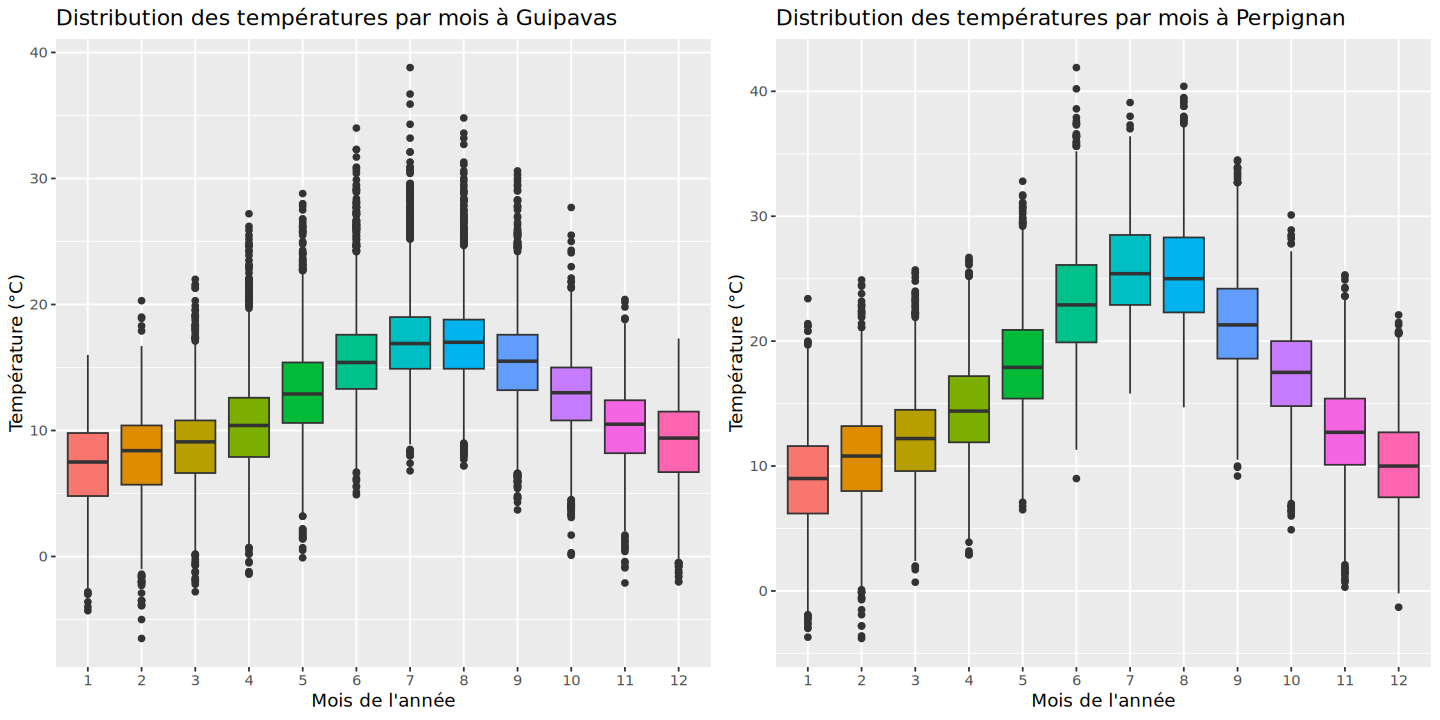

In [22]:
library(gridExtra)

options(repr.plot.width=12, repr.plot.height=6)

p1 <- ggplot(data_cleaned_7110, aes(x = factor(mois), y = Température -273.15, fill = factor(mois))) +
  geom_boxplot() +
  ggtitle("Distribution des températures par mois à Guipavas") +
  xlab("Mois de l'année") + ylab("Température (°C)") +
  theme(legend.position="none")

p2 <- ggplot(data_cleaned_7747, aes(x = factor(mois), y = Température -273.15, fill = factor(mois))) +
  geom_boxplot() +
  ggtitle("Distribution des températures par mois à Perpignan") +
  xlab("Mois de l'année") + ylab("Température (°C)") +
  theme(legend.position="none")

# Affichage côte à côte
grid.arrange(p1, p2, ncol = 2)


La distribution des températures nous confirme qu'il fait en moyenne plus chaud à Perpignan. Les variations de température sont cepedant plus importantes à Perpignan, notamment en automne.

La question que nous nous posons ensuite est celle de l'humidité : nous partons du principe qu'avec le climat océanique, il fait plus humide à Guipavas. Nous traçons alors de la même façon les *boxplot* en fonction des saisons.

Warning message:
“Removed 37 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 78 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


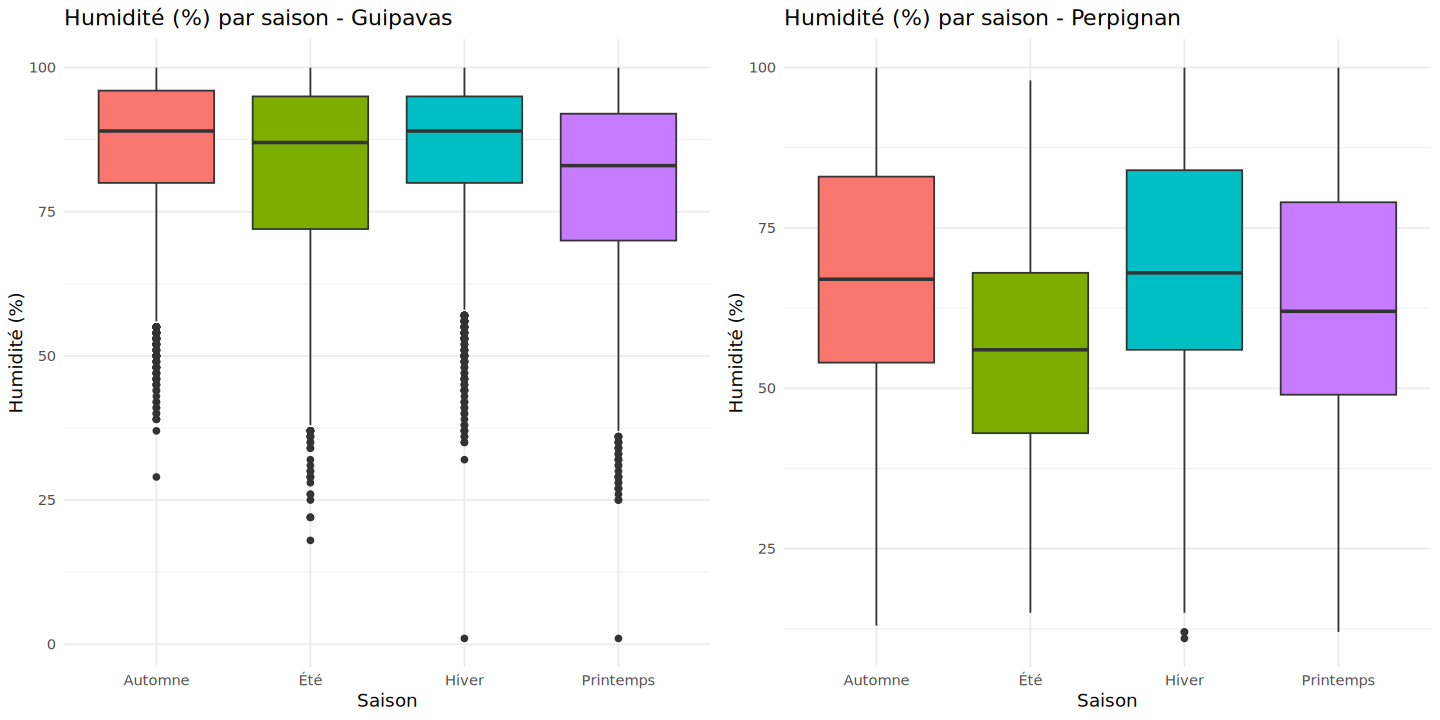

In [23]:
library(gridExtra)
options(repr.plot.width=12, repr.plot.height=6)

# Humidité par saison
p1<-ggplot(data_cleaned_7110, aes(x=saison, y=Humidité, fill=saison)) +
  geom_boxplot() +
  ggtitle("Humidité (%) par saison - Guipavas") + xlab("Saison") + ylab("Humidité (%)") +
  theme_minimal() +
  theme(legend.position="none")

# Humidité par saison
p2<-ggplot(data_cleaned_7747, aes(x=saison, y=Humidité, fill=saison)) +
  geom_boxplot() +
  ggtitle("Humidité (%) par saison - Perpignan") + xlab("Saison") + ylab("Humidité (%)") +
  theme_minimal() +
  theme(legend.position="none")

grid.arrange(p1,p2,ncol=2)


La médiane de l'humidité reste globalement la même à Guipavas, avec des niveaux d'humidité élevés au long de l'année. Au contraire, au fil des saisons, l'humidité varie à Perpignan, restant tout au long de l'année en moyenne inférieure à celle relevée à Guipavas.

Se pose alors la question des précipitations : en effet, il est connu qu'il pleut beaucoup en Bretagne, et notamment dans le nord Finistère. Nous souhaitons alors vérifier cette affirmation par rapport à Perpignan, ville où il pleut le moins. 

Warning message:
“Removed 856 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 864 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


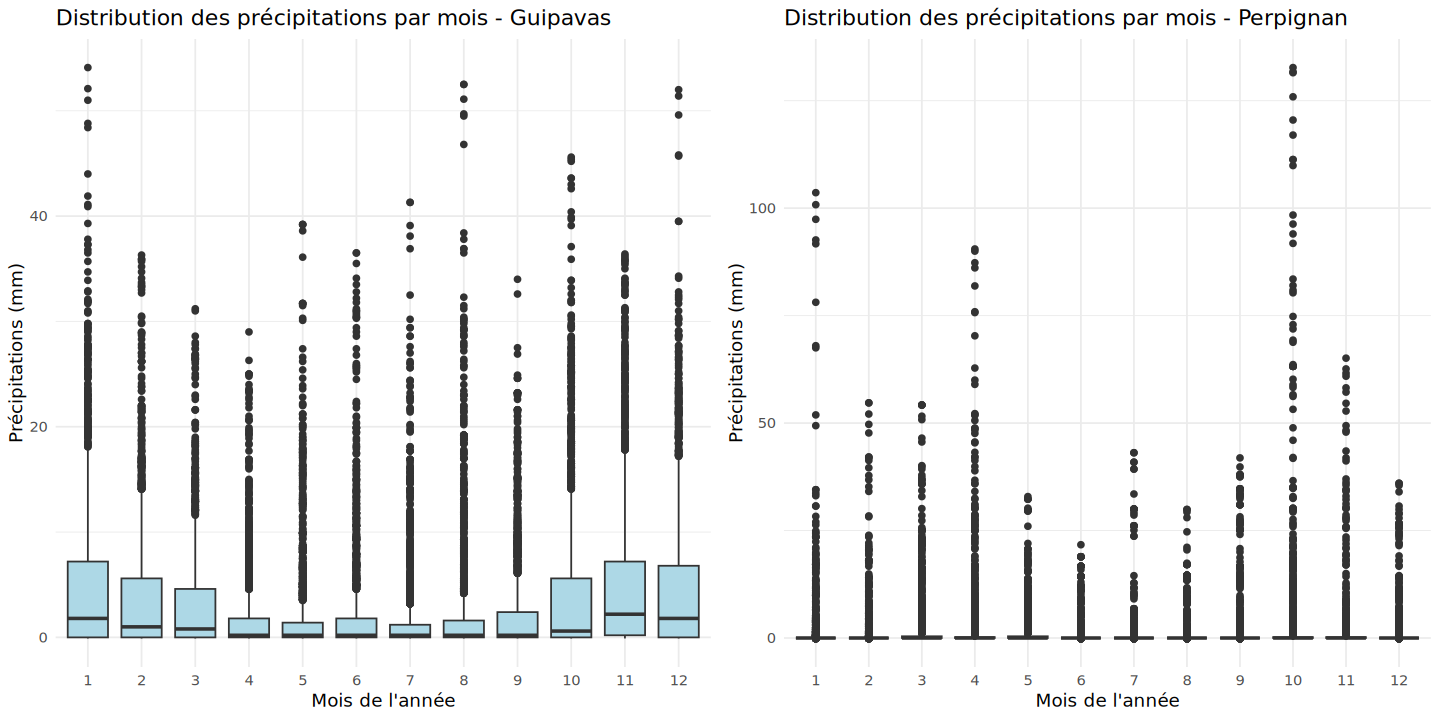

In [24]:
library(ggplot2)
library(gridExtra)

options(repr.plot.width=12, repr.plot.height=6)

p1 <- ggplot(data_cleaned_7110, aes(x = factor(mois), y = Précipitations.dans.les.24.dernières.heures)) +
  geom_boxplot(fill="lightblue") +
  xlab("Mois de l'année") +
  ylab("Précipitations (mm)") +
  ggtitle("Distribution des précipitations par mois - Guipavas") +
  theme_minimal()


p2 <- ggplot(data_cleaned_7747, aes(x = factor(mois), y = Précipitations.dans.les.24.dernières.heures)) +
  geom_boxplot(fill="lightblue") +
  xlab("Mois de l'année") +
  ylab("Précipitations (mm)") +
  ggtitle("Distribution des précipitations par mois - Perpignan") +
  theme_minimal()

grid.arrange(p1, p2, ncol = 2)


Ces *boxplot* des précipitations confirment qu'il pleut en moyenne bien plus à Guipavas qu'à Perpignan, avec des variations selon les mois pour Guipavas. Il pleut effectivement en moyenne plus en automne et en hiver que durant le reste de l'année.

Warning message:
“Removed 856 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 864 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


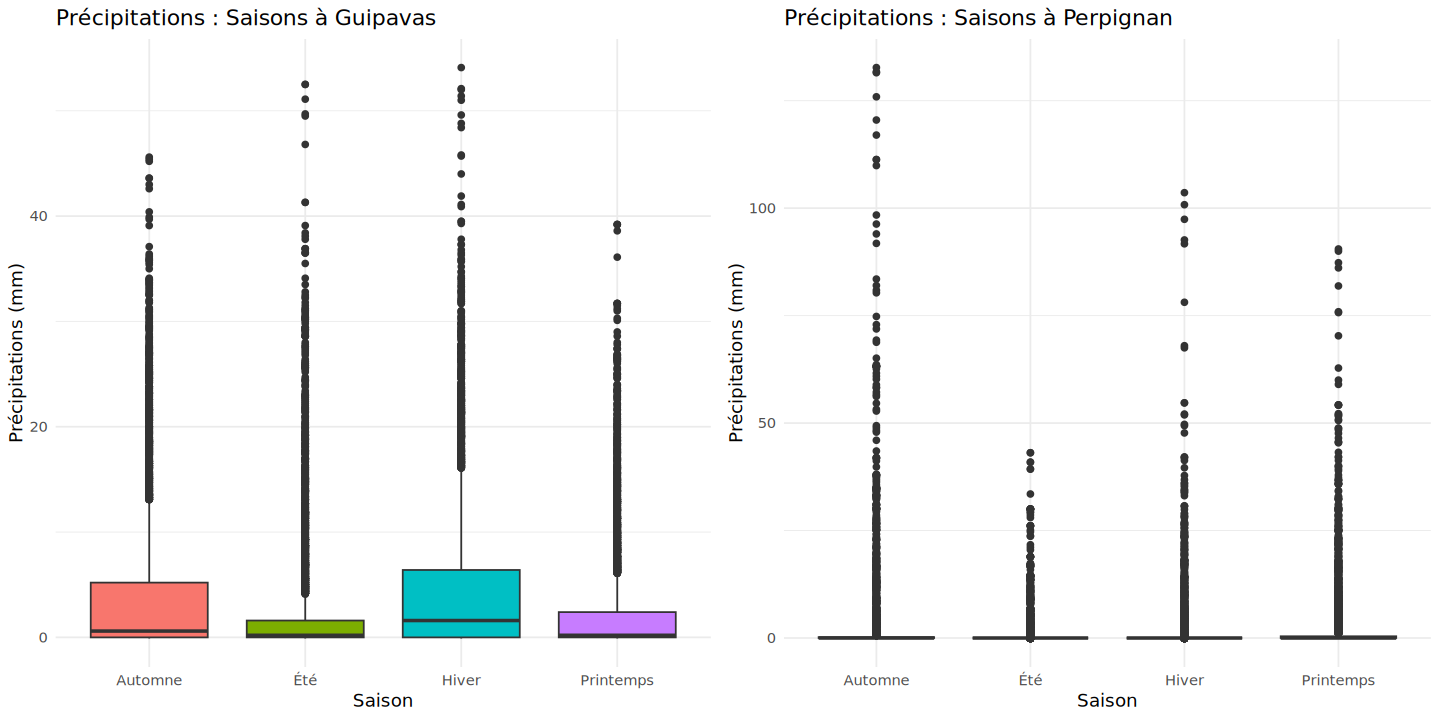

In [25]:
precip_saison_guip <- subset(data_cleaned_7110, saison %in% c("Hiver", "Printemps", "Été", "Automne"))
precip_saison_perp <- subset(data_cleaned_7747, saison %in% c("Hiver", "Printemps", "Été", "Automne"))


library(ggplot2)
library(gridExtra)

options(repr.plot.width=12, repr.plot.height=6)

p1 <- ggplot(precip_saison_guip, aes(x = saison, y = Précipitations.dans.les.24.dernières.heures, fill=saison)) +
  geom_boxplot() +
  ylab("Précipitations (mm)") +
  xlab("Saison") +
  ggtitle("Précipitations : Saisons à Guipavas") +
  theme_minimal() +
  theme(legend.position="none")


p2 <- ggplot(precip_saison_perp, aes(x = saison, y = Précipitations.dans.les.24.dernières.heures, fill=saison)) +
  geom_boxplot() +
  ylab("Précipitations (mm)") +
  xlab("Saison") +
  ggtitle("Précipitations : Saisons à Perpignan") +
  theme_minimal() +
  theme(legend.position="none")

grid.arrange(p1, p2, ncol = 2)
